## 이미지 다운로드
이미 있는 경우 실행하지 않아도 됨

In [2]:
!mkdir -p ~/work/aiffel_quest_rs/Exploration/Ex01/images
!mkdir -p ~/work/aiffel_quest_rs/Exploration/Ex01/models
!cd ~/work/aiffel_quest_rs/Exploration/Ex01/

In [3]:
!wget https://d3s0tskafalll9.cloudfront.net/media/images/E-8-6.max-800x600_rkMHa4K.png # 기본 제공 이미지입니다. 여러분만의 이미지로 수정해보세요!
!mv E-8-6.max-800x600_rkMHa4K.png ./images/image.png

--2026-01-16 04:32:56--  https://d3s0tskafalll9.cloudfront.net/media/images/E-8-6.max-800x600_rkMHa4K.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.45, 3.169.137.128, 3.169.137.123, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363552 (355K) [image/png]
Saving to: ‘E-8-6.max-800x600_rkMHa4K.png’

E-8-6.max-800x600_r 100%[===================>] 355.03K  --.-KB/s    in 0.02s   

2026-01-16 04:32:56 (19.7 MB/s) - ‘E-8-6.max-800x600_rkMHa4K.png’ saved [363552/363552]



In [5]:
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png

!mv E-8-3.png ./images/king.png
!mv E-8-4.png ./images/hero.png

--2026-01-16 04:47:53--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.123, 3.169.137.45, 3.169.137.128, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘E-8-3.png’

E-8-3.png           100%[===================>]  13.19K  --.-KB/s    in 0s      

2026-01-16 04:47:54 (130 MB/s) - ‘E-8-3.png’ saved [13511/13511]

--2026-01-16 04:47:54--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.128, 3.169.137.45, 3.169.137.123, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving to: ‘E-8-4

## 패키지 다운로드
이미 있는 경우 실행하지 않아도 됨

In [5]:
!pip install cmake opencv-python
!conda install -y dlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



## Dlib의 제공되는 모델(필요한 경우에 실행할 것) 

In [6]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ./models
!cd ./ && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2026-01-16 04:34:12--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-16 04:34:13--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.7MB/s    in 4.5s    

2026-01-16 04:34:18 (13.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



## 패키지 선언
필요한 패키지 import 하기
- import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
- import cv2: OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
- import matplotlib.pyplot as plt: 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
- import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
- import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리


In [1]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import dlib 

## FaceStickerProcessor 클래스 정의
- init: dlib의 얼굴 검출기와 랜드마크 예측기를 로드합니다.
- load_image: 이미지를 불러옵니다.
- _calculate_roi: 이미지 경계를 벗어나는 영역을 계산하여 슬라이싱 좌표 반환
- apply_sticker: 랜드마크를 기준으로 스티커의 크기와 위치를 계산하여, 배경을 제외하고 원본 이미지에 자연스럽게 합성합니다.
- get_steps: 특정 타입에 대한 4단계 이미지 생성합니다.
- show_comparison_pipeline: 얼굴 탐지부터 최종본까지의 전 과정을 타입에 따라 단계별로 시각화합니다.

In [2]:
class FaceStickerProcessor:
    def __init__(self, model_path):
        self.detector = dlib.get_frontal_face_detector()
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"모델 파일을 찾을 수 없습니다: {model_path}")
        self.predictor = dlib.shape_predictor(model_path)
        
    def load_image(self, img_path):
        img_bgr = cv2.imread(img_path)
        if img_bgr is None: raise FileNotFoundError(f"이미지 로드 실패: {img_path}")
        return img_bgr

    def _calculate_roi(self, img_shape, refined_x, refined_y, w, h):
        img_h, img_w = img_shape[:2]
        y1, y2 = max(0, refined_y), min(img_h, refined_y + h)
        x1, x2 = max(0, refined_x), min(img_w, refined_x + w)
        sy1, sx1 = max(0, -refined_y), max(0, -refined_x)
        sy2, sx2 = sy1 + (y2 - y1), sx1 + (x2 - x1)
        return (y1, y2, x1, x2), (sy1, sy2, sx1, sx2)

    def apply_sticker(self, img_original, rect, landmarks, sticker_path, sticker_type='king'):
        img_sticker = cv2.imread(sticker_path)
        if img_sticker is None: 
            return img_original.copy()

        # 크기 및 위치 설정
        w = h = rect.width()
        img_sticker = cv2.resize(img_sticker, (w, h))
        
        x, y = landmarks[30] # 코 끝점
        refined_x = x - w // 2
        # 타입별 위치: king은 머리 위, cat은 코 중심
        refined_y = (y - rect.height() // 2 - h) if sticker_type == 'king' else (y - h // 2)

        target_roi, source_roi = self._calculate_roi(img_original.shape, refined_x, refined_y, w, h)
        y1, y2, x1, x2 = target_roi
        sy1, sy2, sx1, sx2 = source_roi

        if (y2 - y1) <= 0 or (x2 - x1) <= 0: return img_original.copy()

        img_result = img_original.copy()
        sticker_crop = img_sticker[sy1:sy2, sx1:sx2]
        canvas_crop = img_result[y1:y2, x1:x2]

        # 알파 채널 처리 또는 배경색 제거
        if sticker_crop.shape[2] == 4:
            alpha = sticker_crop[:, :, 3] / 255.0
            for c in range(3):
                img_result[y1:y2, x1:x2, c] = (1.0 - alpha) * canvas_crop[:, :, c] + alpha * sticker_crop[:, :, c]
        else:
            bg_val = 0 if sticker_type == 'king' else 255
            img_result[y1:y2, x1:x2] = np.where(sticker_crop == bg_val, canvas_crop, sticker_crop)

        return img_result

    def get_steps(self, img_bgr, rect, landmarks, sticker_path, sticker_type):
        # Step 1: Rectangle
        step1 = img_bgr.copy()
        cv2.rectangle(step1, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 3)
        
        # Step 2: Dots (노란색 점, 크기 3)
        step2 = step1.copy()
        for pt in landmarks: 
            cv2.circle(step2, pt, 3, (0, 255, 255), -1)
        
        # Step 3: Mix (가이드라인 + 스티커)
        step3 = self.apply_sticker(step2, rect, landmarks, sticker_path, sticker_type)
        
        # Step 4: Final (순수 스티커)
        step4 = self.apply_sticker(img_bgr, rect, landmarks, sticker_path, sticker_type)
        
        return [step1, step2, step3, step4]

    def show_comparison_pipeline(self, img_path, cat_sticker_path, king_sticker_path):
        img_bgr = self.load_image(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        rects = self.detector(img_rgb, 1)
        
        if not rects:
            print("얼굴을 찾을 수 없습니다.")
            return

        rect = rects[0]
        landmarks = list(map(lambda p: (p.x, p.y), self.predictor(img_rgb, rect).parts()))

        # Cat 4단계 + King 4단계 생성
        cat_steps = self.get_steps(img_bgr, rect, landmarks, cat_sticker_path, 'cat')
        king_steps = self.get_steps(img_bgr, rect, landmarks, king_sticker_path, 'king')
        all_images = cat_steps + king_steps
        
        titles = [
            '1. [CAT] Face Detection (Rectangle)', 
            '2. [CAT] Facial Landmarks (Yellow Dots)', 
            '3. [CAT] Combined View', 
            '4. [CAT] Final Result',
            '1. [KING] Face Detection (Rectangle)', 
            '2. [KING] Facial Landmarks (Yellow Dots)', 
            '3. [KING] Combined View', 
            '4. [KING] Final Result'
        ]

        # 8행 1열 설정
        # figsize=(12, 60) 정도로 세로를 매우 길게 설정하여 각 이미지를 크게 만듭니다.
        plt.figure(figsize=(12, 60)) 
        for i in range(8):
            plt.subplot(8, 1, i + 1)
            plt.imshow(cv2.cvtColor(all_images[i], cv2.COLOR_BGR2RGB))
            plt.title(titles[i], fontsize=20, pad=20) # 제목 크기와 여백 증대
            plt.axis('off')
        
        plt.tight_layout(pad=5.0) # 이미지 간 간격 확보
        plt.show()

## main Code

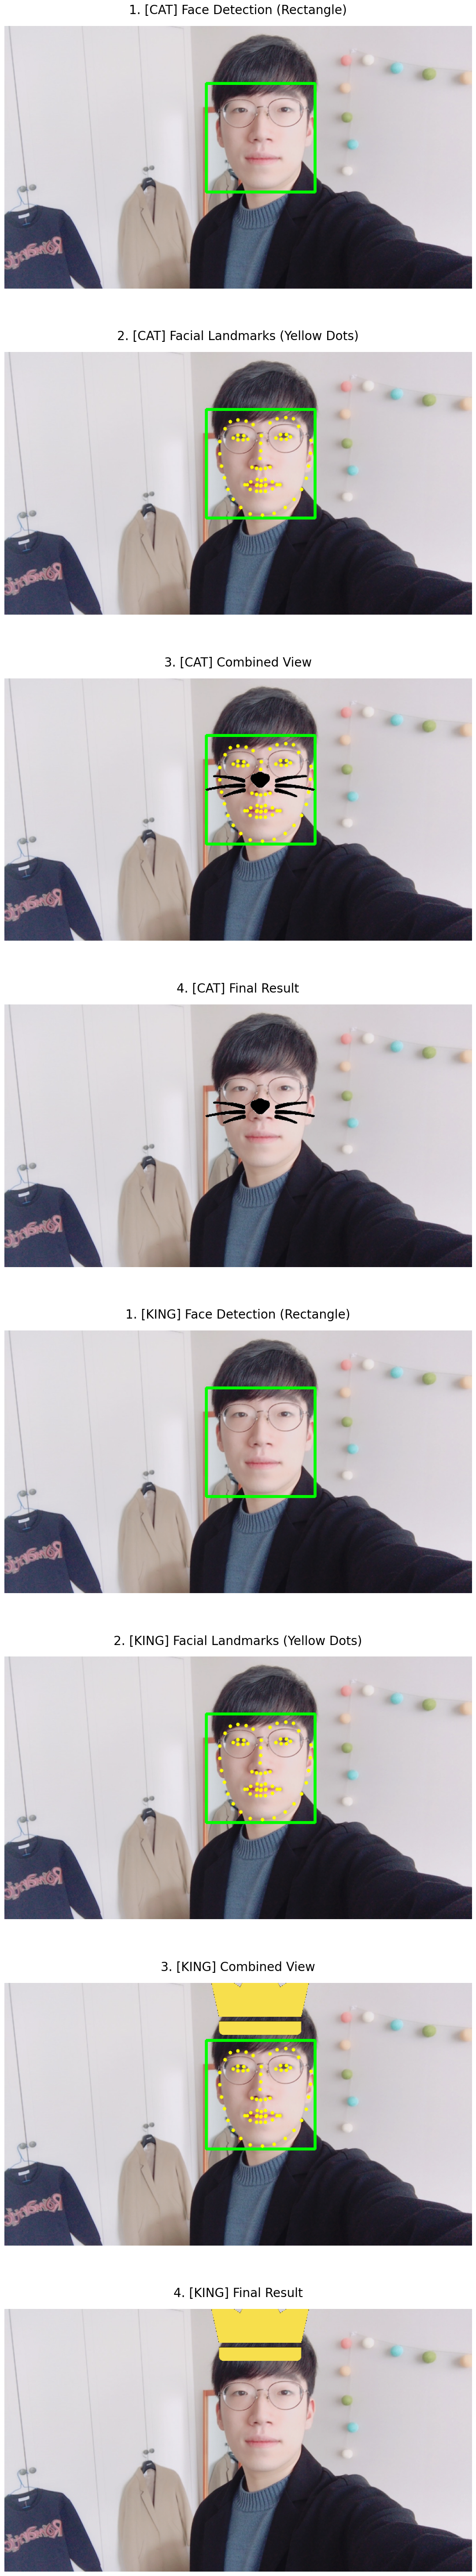

In [3]:
# 경로 설정
model_file = './models/shape_predictor_68_face_landmarks.dat'
image_file = './images/image.png'
cat_sticker_file = './images/cat.png'
king_sticker_file = './images/king.png'

processor = FaceStickerProcessor(model_file)
processor.show_comparison_pipeline(image_file, cat_sticker_file, king_sticker_file)